Silhouette_score k-Means : 0.3227414821130428
Silhouette_score k-Means++ : 0.30298806004124035


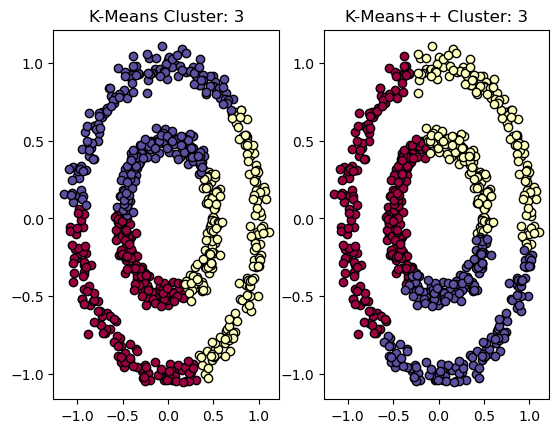

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs, make_circles, make_moons

centers = [[1, 1], [-1, -1], [1, -1]]
#X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.3, random_state=0)

X, labels_true = make_circles(n_samples=750, factor=.5, noise=.05)

#X, labels_true = make_moons(n_samples=750, noise=.07)                                                      

k = 3

# Compute KMeans
kmeans = KMeans(n_clusters = k, n_init=1, init = 'random', max_iter=3).fit(X)

# Compute KMeans++
kmeans_plus = KMeans(n_clusters = k, n_init=1, init = 'k-means++', max_iter=3).fit(X)


plt.subplot(1, 2, 1)
unique_labels = set(kmeans.labels_)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):

    kmeans_labels = (kmeans.labels_ == k)

    xy = X[kmeans_labels]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('K-Means Cluster: %d' % kmeans.n_clusters)

plt.subplot(1, 2, 2)

unique_labels = set(kmeans_plus.labels_)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):

    kmeansplus_labels = (kmeans_plus.labels_ == k)

    xy = X[kmeansplus_labels]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('K-Means++ Cluster: %d' % kmeans_plus.n_clusters)

print("Silhouette_score k-Means :",silhouette_score(X, kmeans_labels))
print("Silhouette_score k-Means++ :", silhouette_score(X, kmeansplus_labels))

Silhouette_score k-Means : 0.32566686641923753
Silhouette_score k-Means++ : 0.32566686641923753


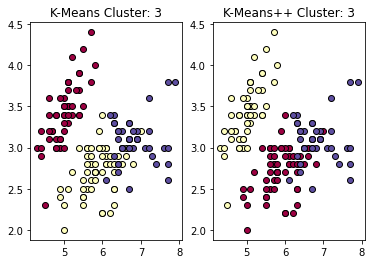

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.metrics import silhouette_score

iris = datasets.load_iris()

X = iris.data
y = iris.target

k = 3

# Compute KMeans
kmeans = KMeans(n_clusters = k, init = 'random').fit(X)

# Compute KMeans++
kmeans_plus = KMeans(n_clusters = k, init = 'k-means++').fit(X)


plt.subplot(1, 2, 1)
unique_labels = set(kmeans.labels_)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):

    kmeans_labels = (kmeans.labels_ == k)

    xy = X[kmeans_labels]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('K-Means Cluster: %d' % kmeans.n_clusters)

plt.subplot(1, 2, 2)

unique_labels = set(kmeans_plus.labels_)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):

    kmeansplus_labels = (kmeans_plus.labels_ == k)

    xy = X[kmeansplus_labels]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('K-Means++ Cluster: %d' % kmeans_plus.n_clusters)

print("Silhouette_score k-Means :",silhouette_score(X, kmeans_labels))
print("Silhouette_score k-Means++ :", silhouette_score(X, kmeansplus_labels))

n_clusters k-Means= 2 Silhouette_score: 0.681046169211746
n_clusters k-Means= 3 Silhouette_score: 0.5528190123564091
n_clusters k-Means= 4 Silhouette_score: 0.49745518901737446
n_clusters k-Means= 5 Silhouette_score: 0.4887488870931048
n_clusters k-Means= 6 Silhouette_score: 0.3648340039670018
n_clusters k-Means= 7 Silhouette_score: 0.3568618172536361
n_clusters k-Means= 8 Silhouette_score: 0.3519340715227998
n_clusters k-Means= 9 Silhouette_score: 0.33193334853298057
n_clusters k-Means= 10 Silhouette_score: 0.32304988192124384


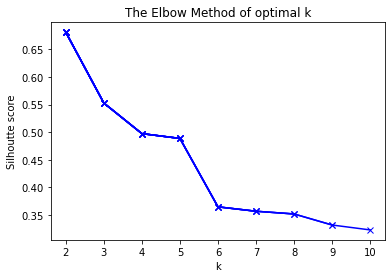

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.metrics import silhouette_score

iris = datasets.load_iris()

X = iris.data
y = iris.target

silhouette_kmeans = {}
K = [2, 3, 4, 5, 6, 7, 8, 9, 10]
for k in K:
    kmeans = KMeans(n_clusters= k, init = 'k-means++').fit(X) 
    kmeans_labels = kmeans.labels_
    silhouette_kmeans[k] = silhouette_score(X, kmeans_labels)
    print("n_clusters k-Means=", k, "Silhouette_score:", silhouette_kmeans[k])
    pl.plot(list(silhouette_kmeans.keys()), list(silhouette_kmeans.values()), 'b-x')
    
pl.xlabel('k')
pl.ylabel('Silhoutte score')
pl.title('The Elbow Method of optimal k')

pl.show()